In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [8]:
import torch
import torch.nn as nn

In [300]:
class KNN(nn.Module):

    def __init__(self, *args, **kwargs):
        super(KNN, self).__init__(*args, **kwargs)

    def distant(self, x1, x2):
        """
        x1.shape = (1,n)
        x2.shape = (m,n)
        """
        return np.linalg.norm(x2 - x1, axis=1)

    def train(self, X, Y, *args, **kwargs):
        self.X = X
        self.Y = Y

    def predict(self, X, k=2):
        y_end = []
        l = len(set(self.Y.flatten()))
        for point in X:
            d = pd.DataFrame(np.stack((self.distant(point, self.X), self.Y), axis=1))
            d = pd.DataFrame.sort_values(d, 0).reset_index(drop=True).T
            
            lables = [0 for i in range(l)]
            # print(len(lables))
            for i in range(k):
                lables[int(d[i][1])] += 1
            y_end.append(sorted(zip(lables, range(l)), reverse=True)[0][1])
        return y_end

In [344]:
class KNN2D(nn.Module):

    def __init__(self, *args, **kwargs):
        super(KNN2D, self).__init__(*args, **kwargs)

    def train(self, X, Y):
        self.pal = list(zip(X, Y))
        # self.n_classes = len(set(Y))
    
    def predict(self, X, k=2):
        y_end = []
        for point in X:
            distance_list = [ [self.eq_distant(point, p2[0]), p2[1]] for i, p2 in enumerate(self.pal) ]
            class_counter_list = {i[1]:0 for i in self.pal}
            distance_list = sorted(distance_list)
            for i in range(k):
                class_counter_list[distance_list[i][1]] += 1
            y_end.append(sorted(class_counter_list, key=class_counter_list.get, reverse=True)[0])
        return y_end
    

In [345]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [346]:
X1, Y1 = make_blobs(n_features=2, centers=3)

In [347]:
xtr, xte, ytr, yte = train_test_split(X1, Y1, train_size=.8)

In [348]:
fig, axes = plt.subplots(ncols=2)
# print(X1.shape)
axes[0].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[0].scatter(xte[:,0], xte[:,1], marker='*', c='r')

knn = KNN2D()
knn.train(xtr.tolist(), ytr.tolist())
# print(xte.tolist()[0])
yp = np.array(knn.predict(xte.tolist(), k=1))
# print(len(yp))
axes[1].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[1].scatter(xte[:,0], xte[:,1], marker='*', c=yp)


ModuleAttributeError: 'KNN2D' object has no attribute 'eq_distant'

In [349]:
a = np.array([[1,0,0], [0,3,0], [0,0,-6], [1,1,1]])
b = np.array([[3,3,3]])
# print(a - b)
# print(np.linalg.norm((a - b)[0]))
# print(np.linalg.norm((a - b), axis=1))
c = np.linalg.norm(a-b, axis=1)
# c.dtype=[('name', float)]
d = np.array([0,1,2,3])
np.sort(c)
# np.sort()
g = np.stack((c,d),axis=1)
print(g)
# gg.dtype = [('name',float),('sur',int)]
# print(gg)
gp = pd.DataFrame(g)
gp = pd.DataFrame.sort_values(gp, 0)
gp.reset_index(drop=True).T[2]

[[4.69041576 0.        ]
 [4.24264069 1.        ]
 [9.94987437 2.        ]
 [3.46410162 3.        ]]


0    4.690416
1    0.000000
Name: 2, dtype: float64

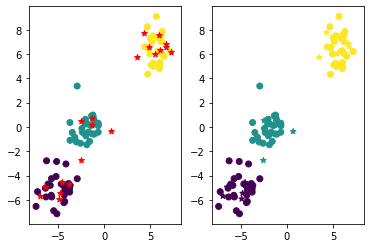

In [350]:
fig, axes = plt.subplots(ncols=2)
# print(X1.shape)
axes[0].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[0].scatter(xte[:,0], xte[:,1], marker='*', c='r')

knn = KNN()
knn.train(xtr, ytr)
# print(xte.tolist()[0])
yp = np.array(knn.predict(xte, k=2))
# print(len(yp))
axes[1].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[1].scatter(xte[:,0], xte[:,1], marker='*', c=yp)

In [351]:
X2, Y2 = make_blobs(n_features=3, centers=3)


In [352]:
xtr, xte, ytr, yte = train_test_split(X2, Y2, train_size=.8, random_state=2)
# xtr[:,1]

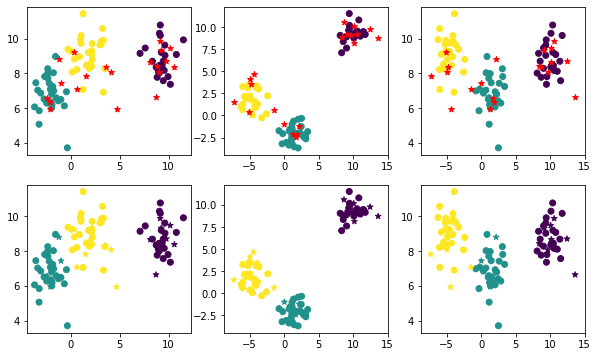

In [355]:
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(10,6))

axes[0][1].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[0][2].scatter(xtr[:,0], xtr[:,2], marker='o', c=ytr)
axes[0][0].scatter(xtr[:,1], xtr[:,2], marker='o', c=ytr)
axes[0][1].scatter(xte[:,0], xte[:,1], marker='*', c='r')
axes[0][2].scatter(xte[:,0], xte[:,2], marker='*', c='r')
axes[0][0].scatter(xte[:,1], xte[:,2], marker='*', c='r')

knn = KNN()
knn.train(xtr, ytr)
yp = np.array(knn.predict(xte, k=1))

axes[1][1].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[1][2].scatter(xtr[:,0], xtr[:,2], marker='o', c=ytr)
axes[1][0].scatter(xtr[:,1], xtr[:,2], marker='o', c=ytr)
axes[1][1].scatter(xte[:,0], xte[:,1], marker='*', c=yp)
axes[1][2].scatter(xte[:,0], xte[:,2], marker='*', c=yp)
axes[1][0].scatter(xte[:,1], xte[:,2], marker='*', c=yp)


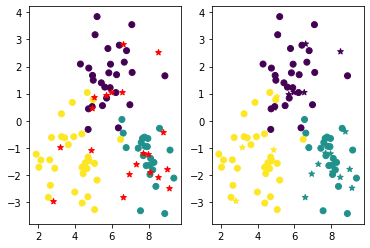

In [312]:
fig, axes = plt.subplots(ncols=2)
# print(X1.shape)
axes[0].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[0].scatter(xte[:,0], xte[:,1], marker='*', c='r')

knn = KNN()
knn.train(xtr, ytr)
# print(xte.tolist()[0])
yp = np.array(knn.predict(xte, k=2))
# print(len(yp))
axes[1].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[1].scatter(xte[:,0], xte[:,1], marker='*', c=yp)